Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [18]:
df = pd.read_csv('ab_testing.csv')

In [19]:
df

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland
...,...,...,...,...,...,...,...
4995,16360,B,12,313,No,Mobile,Wales
4996,18084,B,10,313,No,Desktop,Northern Ireland
4997,12063,A,11,156,No,Desktop,England
4998,18647,B,13,346,No,Desktop,Wales


In [20]:
df.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


Transforming the Conversion column to binary format

In [21]:
df['Conversion'] = df['Conversion'].map({'Yes':1, 'No':0})


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   int64 
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
dtypes: int64(4), object(3)
memory usage: 273.6+ KB


In [23]:
df.describe()

,User ID,Page Views,Time Spent,Conversion
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,14925.159000,7.537600,242.512600,0.097000
std,2869.153773,4.022465,118.254153,0.295987
min,10001.000000,1.000000,40.000000,0.000000
25%,12456.250000,4.000000,137.000000,0.000000
50%,14858.500000,8.000000,243.000000,0.000000
75%,17379.750000,11.000000,346.000000,0.000000
max,19995.000000,14.000000,449.000000,1.000000


In [24]:
df.isnull().sum()

User ID       0
Group         0
Page Views    0
Time Spent    0
Conversion    0
Device        0
Location      0
dtype: int64

In [25]:
df.duplicated().sum()

0

In [26]:
convertion_rates = df.groupby('Group')['Conversion'].mean()

In [27]:
convertion_rates

Group
A    0.053990
B    0.140669
Name: Conversion, dtype: float64

In [28]:
from statsmodels.stats.proportion import proportions_ztest

successes = df.groupby('Group')['Conversion'].sum().values
nobs = df.groupby('Group')['Conversion'].count().values

z_stat, p_val = proportions_ztest(count=successes, nobs=nobs)
print(f"Z-stat: {z_stat:.2f}, p-value: {p_val:.4f}")

Z-stat: -10.35, p-value: 0.0000


In [29]:
df['Group'].value_counts()

Group
A    2519
B    2481
Name: count, dtype: int64

In [30]:
df['Conversion'].mean()

0.097

In [32]:
df.groupby('Group')[['Page Views', 'Time Spent']].mean()


,Page Views,Time Spent
Group,,
A,7.581580,241.733227
B,7.492946,243.303910


In [34]:
df.groupby(['Device', 'Group'])['Conversion'].mean().unstack()


Group,A,B
Device,,
Desktop,0.058682,0.139104
Mobile,0.049412,0.142376


In [36]:
df.groupby(['Location', 'Group'])['Conversion'].mean().unstack()

Group,A,B
Location,,
England,0.069307,0.146875
Northern Ireland,0.050489,0.114650
Scotland,0.049254,0.150573
Wales,0.047695,0.151163


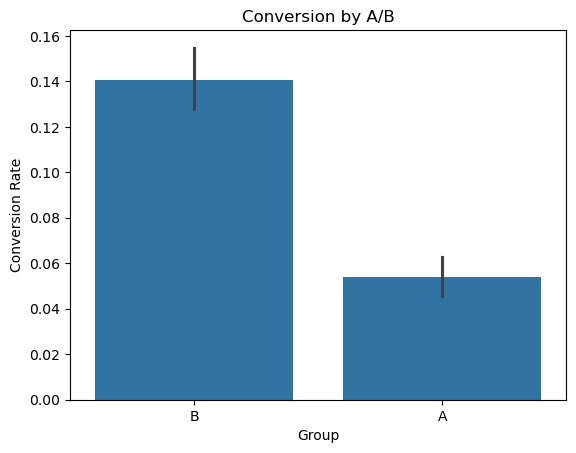

In [53]:
sns.barplot(x='Group', y='Conversion', data=df)
plt.title("Conversion by A/B")
plt.ylabel("Conversion Rate")
plt.show()

C:\Users\multi\AppData\Local\Temp\ipykernel_21640\348759596.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax1 = sns.barplot(
C:\Users\multi\AppData\Local\Temp\ipykernel_21640\348759596.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(
C:\Users\multi\AppData\Local\Temp\ipykernel_21640\348759596.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax2 = sns.barplot(
C:\Users\multi\AppData\Local\Temp\ipykernel_21640\348759596.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(


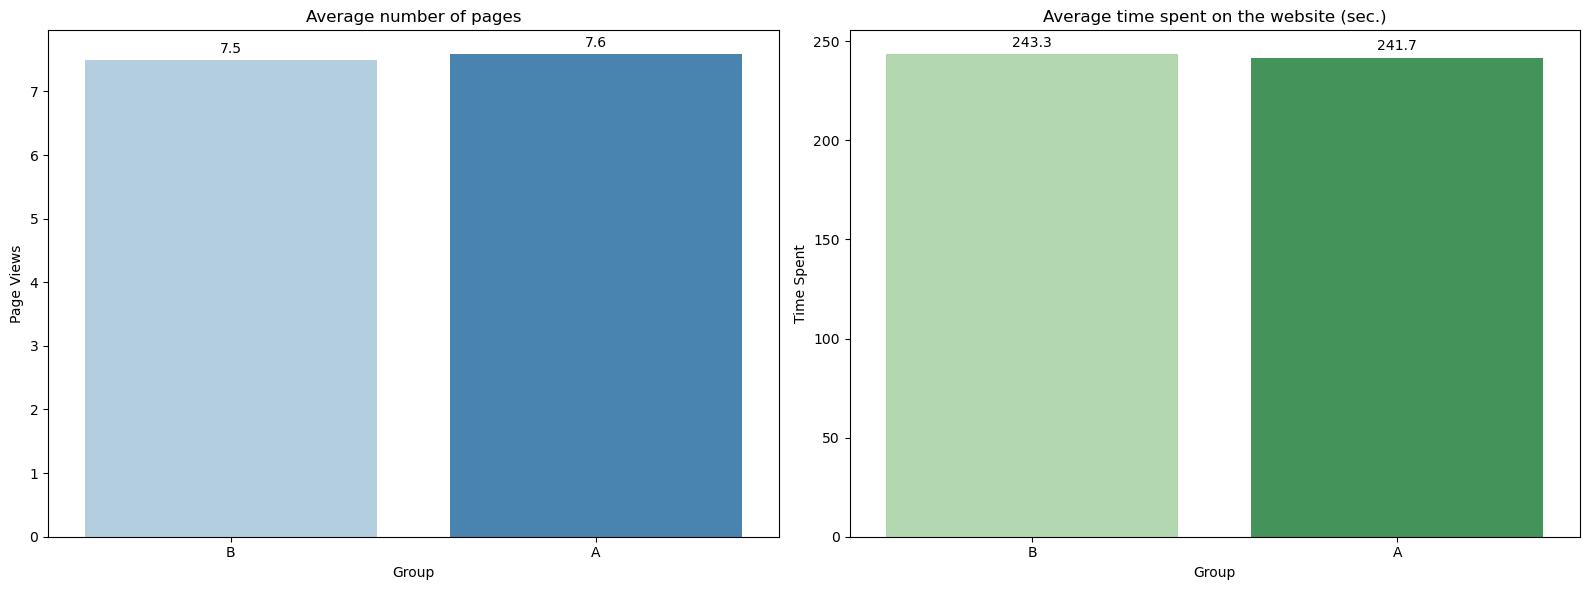

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

ax1 = sns.barplot(
    data=df,
    x='Group', y='Page Views',
    estimator='mean', ci=None, palette='Blues', ax=axes[0]
)
ax1.set_title('Average number of pages')
for bar in ax1.containers:
    ax1.bar_label(bar, fmt='%.1f', padding=3)

ax2 = sns.barplot(
    data=df,
    x='Group', y='Time Spent',
    estimator='mean', ci=None, palette='Greens', ax=axes[1]
)
ax2.set_title('Average time spent on the website (sec.)')
for bar in ax2.containers:
    ax2.bar_label(bar, fmt='%.1f', padding=3)

plt.tight_layout()
plt.show()


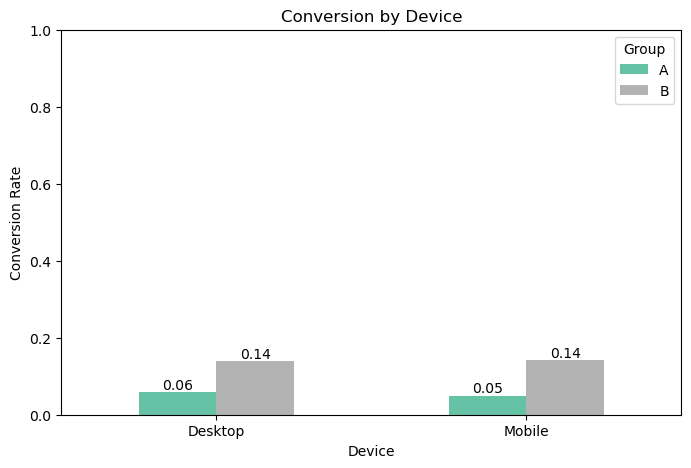

In [49]:
device_conversion = df.groupby(['Device', 'Group'])['Conversion'].mean().unstack()

ax = device_conversion.plot(kind='bar', figsize=(8, 5), colormap='Set2')
plt.title("Conversion by Device")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=0)
plt.ylim(0, 1)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()


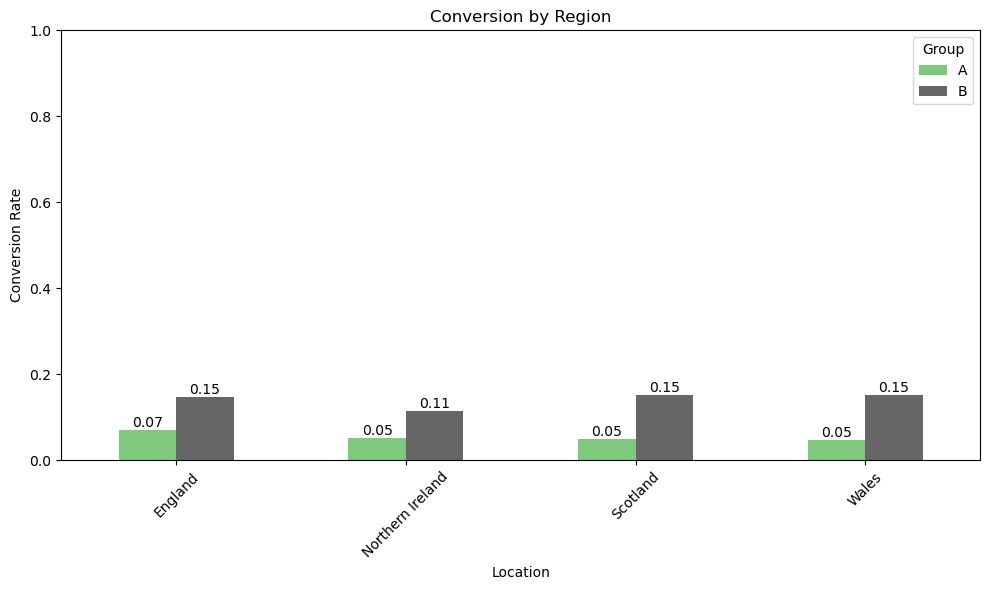

In [50]:
location_conversion = df.groupby(['Location', 'Group'])['Conversion'].mean().unstack()

ax = location_conversion.plot(kind='bar', figsize=(10, 6), colormap='Accent')
plt.title("Conversion by Region")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.ylim(0, 1)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

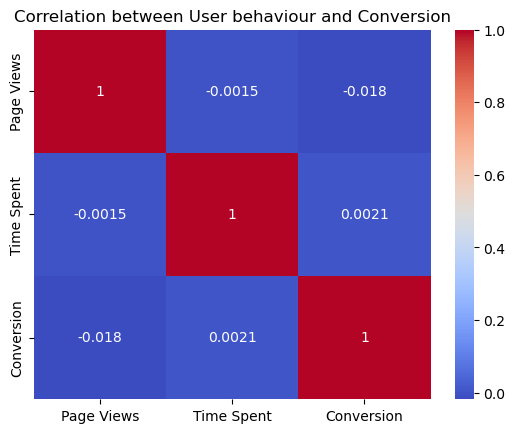

In [51]:
corr = df[['Page Views', 'Time Spent', 'Conversion']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between User behaviour and Conversion")
plt.show()